### Introduction

#### Motivation
The objective is to better understand the CRISP-DM process by focusing on investigating the dataset, setting up business questions, preparing & cleaning the data, modeling & evaluating the dataset and becoming familiarized with simple churn analysis

#### Methods
- Data Cleaning
- High Level Statistics
    - Variance Analysis
    - Standard Deviation Analysis
    - Correlation
    - Histogram Analysis
    - Box Plot Analysis
- Predictive Analytics
    - Logistic Regression
    - Support Vector Machine
    - kNN
    - Naïve Bayes
    - Random Forest
- Predictive Analytics using Boosting Algorithms
    - AdaBoost
    - Gradient Boosting
    - Xtreme Gradient Boosting

### The Dataset

#### Description
The Telco Co. data contains information about customers who have left, stayed and signed up for their services. The dataset also contains multiple important demographics for each customer

#### Data Overview
- **File(s):** wa_fn-usec_-telco-customer-churn__1_.csv
- **Table(s):** wa_fn-usec_-telco-customer-chur
- **Variables in the table:** customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges and Churn

#### Attribute Overview
- **customerID:** A unique ID that identifies each customer
- **gender:** The customer’s gender
- **SeniorCitizen:** Indicates if the customer is 65 or older
- **Partner:** Indicates if the customer has a partner or not
- **Dependents:** Indicates if the customer lives with any dependents or not (children, parents, grandparents, etc.)
- **tenure:** Indicates the total amount of months that the customer has been with the company
- **PhoneService:** Indicates if the customer has subscription of phone service or not
- **MultipleLines:** Indicates if the customer has subscription to multiple telephone lines or not
- **InternetService:** Indicates if the customer has subscription to internet service or not
- **OnlineSecurity:** Indicates if the customer has subscription to online security or not
- **OnlineBackup:** Indicates if the customer has subscription to online backup or not
- **DeviceProtection:** Indicates if the customer has subscription to device protection or not
- **TechSupport:** Indicates if the customer has subscription to tech support or not
- **StreamingTV:** Indicates if the customer uses the company's internet service to stream TV programs from a third party provider
- **StreamingMovies:** Indicates if the customer uses the company's internet service to stream movies from a third party provider
- **Contract:** Indicates the customer’s current contract type
- **PaperlessBilling:** Indicates if the customer has opted for paperless billing or not
- **PaymentMethod:** Indicates the customer’s payment method
- **MonthlyCharges:** Indicates the customer’s current total monthly charge for all the services provided by the company
- **TotalCharges:** Indicates the customer’s total charges
- **Churn:** Indicates whether the customer has churned or not

#### Importing Python libraries and Loading the dataset

In [55]:
from sklearn import metrics, preprocessing
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('wa_fn-usec_-telco-customer-churn__1_.csv')

#### Displaying the first 5 observations

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Displaying the last 5 observations

In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### Displaying the number of observations(rows) and variables(columns)

In [5]:
df.shape

(7043, 21)

#### Displaying the variable names and data types

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Changing the type of TotalCharges column from object to float

In [52]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast='float', errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                 int64
dtype: object

#### Converting Churn to represent Binary values

In [8]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

### Data Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate or incomplete data within a dataset. If data is incorrect, outcomes and algorithms become unreliable, even though they may be implemented correctly because of this it becomes crucial to perform data cleaning

The most common data cleaning practices include:

<ul style="list-style-type:square">
    <li>Removing duplicate or irrelevant observations</li>
    <li>Fixing structural errors such as strange naming conventions, typos or incorrect capitalization</li>
    <li>Filtering unwanted outliers (if needed)</li>
    <li>Handling missing data</li>
</ul>

- Count of non-missing values for each variable

In [9]:
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7032
Churn               7043
dtype: int64

- Detecting missing values

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Removing missing values

In [11]:
df.dropna(inplace=True)

- Detecting redundant data

In [12]:
df.duplicated().sum()

0

#### Descriptive statistics

Descriptive statistics summarizes a given data set, which can be either a representation of the entire population or a sample of the population. Descriptive statistics can be broken down into measures of central tendency and measures of variability/ spread. Measures of central tendency include mean, median and mode whereas measures of variability include standard deviation, variance, minimum and maximum variables, kurtosis and skewness

- **count:** Count of non-empty values
- **mean:** The mean(average) value
- **std:** Standard deviation
- **min:** Minimum value
- **25%:** The 25% percentile value
- **50%:** The 50% percentile value
- **75%:** The 75% percentile value
- **max:** Maximum value

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300537,0.265785
std,0.368844,24.545260,30.085974,2266.771484,0.441782
min,0.000000,1.000000,18.250000,18.799999,0.000000
25%,0.000000,9.000000,35.587500,401.449997,0.000000
50%,0.000000,29.000000,70.350000,1397.475037,0.000000
75%,0.000000,55.000000,89.862500,3794.737488,1.000000
max,1.000000,72.000000,118.750000,8684.799805,1.000000


#### Summarizing the dataframe

A short summary of the dataframe which consists of information such as RangeIndex, Data columns, dtypes and memory usage

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### High Level Statistics

High level statistics describes those operations that are more abstract in nature, wherein the overall goals and systemic features are typically more concerned with the wider, macro system as a whole

#### Variance Analysis

Variance is the expected value of the squared variation of a random variable from its mean. In other words, variance estimates how far the data points are spread out from their mean

In [15]:
df.var(numeric_only=True)

SeniorCitizen     1.360459e-01
tenure            6.024698e+02
MonthlyCharges    9.051658e+02
TotalCharges      5.138252e+06
Churn             1.951711e-01
dtype: float64

#### Standard Deviation Analysis

Standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. A standard deviation close to zero indicates that data points are close to the mean, whereas a high or low standard deviation indicates data points are respectively above or below the mean

In [16]:
df.std(numeric_only=True)

SeniorCitizen        0.368844
tenure              24.545260
MonthlyCharges      30.085974
TotalCharges      2266.771484
Churn                0.441782
dtype: float64

From the analysis of Variance and Standard Deviation it can be concluded that:

<ul style="list-style-type:square">
    <li>The data points of TotalCharges, MonthlyCharges and tenure are quite spread out, away from the mean and from one another becuase these two attributes have the highest variance and standard deviation</li>
    <li>The other attributes Churn and SeniorCitizen represent binary values that is why they have low variance and standard deviation</li>
</ul>

#### Correlation

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data.The correlation coefficient 'r' describes the extent of this statistical relationship

A correlation coefficient of zero indicates that no linear relationship exists between the two variables. A correlation coefficient of −1 or +1 indicates a perfect linear relationship. The stronger the correlation, the closer the correlation coefficient is to ±1. If the coefficient is a positive number, the variables are directly related (i.e. as the value of one variable goes up the value of the other also tends to go up). But if the coefficient is a negative number, the variables are inversely related (i.e. as the value of one variable goes up the value of the other tends to go down)

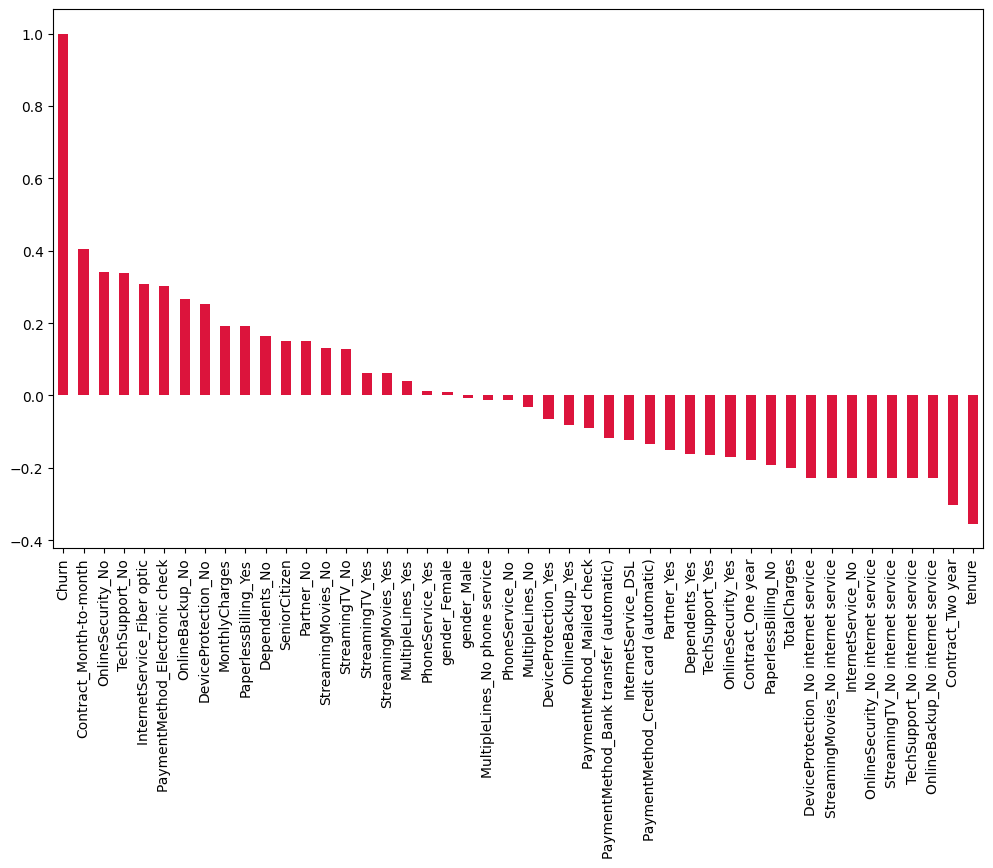

In [17]:
# Converting categorical variable into indicator variables after dropping customerID column
df2 = pd.get_dummies(df.drop('customerID', axis=1))

fig, ax = plt.subplots(figsize=(12, 7))
corr = df2.corr()['Churn'].sort_values(ascending=False)
corr.plot(kind='bar', color='crimson', ax=ax)
plt.show()

Since our analysis focuses on analyzing the churn rate we will keep an eye out for correlations that involve churn specifically

<ul style="list-style-type:square">
    <li>Contract(Month-to-Month) and Churn have the strongest correlation that of 0.4</li>
    <li>No OnlineSecurity and Churn also have a strong correlation score of 0.34</li>
    <li>The third highest correlation of 0.33 exists between No TechSupport and Churn</li>
</ul>

#### Histogram Analysis

A histogram is a graphical representation of data points organized into user-specified ranges. Similar in appearance to a bar graph, the histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins

A histogram can be used whenever there is a need to display a comparison of the distribution of certain numerical data in various range of intervals. Histograms can help the audience understand essential meanings and patterns related to a large amount of data

Histograms can be classified as:

<ul style="list-style-type:square">
    <li><b>Uniformly Distributed:</b> A uniform distribution reveals that the number of classes is too small and that each class has the same number of elements. It may involve a distribution that has several peaks</li>
    <li><b>Positively Skewed (Right-skewed):</b> A positively skewed histogram has a right-skewed distribution. In a right-skewed distribution, most of the data points occur on the left side as compared to the right</li>
    <li><b>Negatively Skewed (Left-skewed):</b> A negatively skewed histogram has a left-skewed distribution. In a left-skewed distribution, most of the data points occur on the right side as compared to the left</li>
    <li><b>Symmetric (Bell-shaped):</b> A symmetric histogram has a bell-shaped distribution. When you draw the vertical line down the center of the histogram and the two sides are identical in size and shape, the histogram is said to be symmetric</li>
    <li><b>Randomly Distributed:</b> A random distribution lacks an apparent pattern and has several peaks. The case may be that different data properties were combined. Therefore, the data should be analyzed separately</li>
</ul>

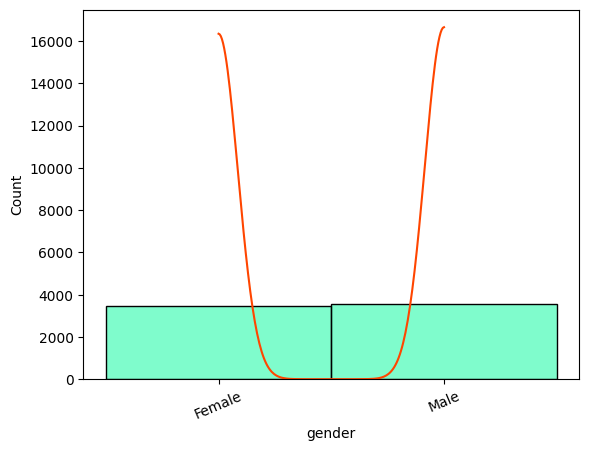

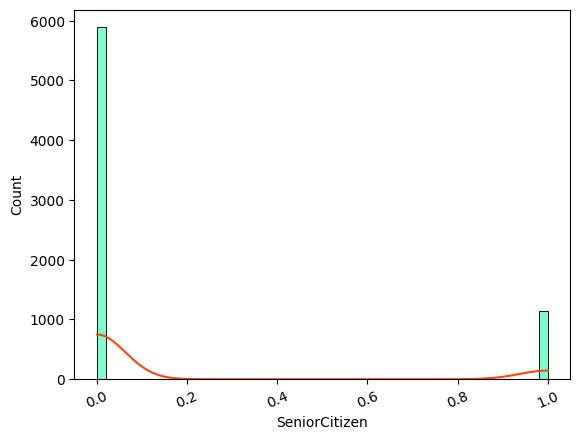

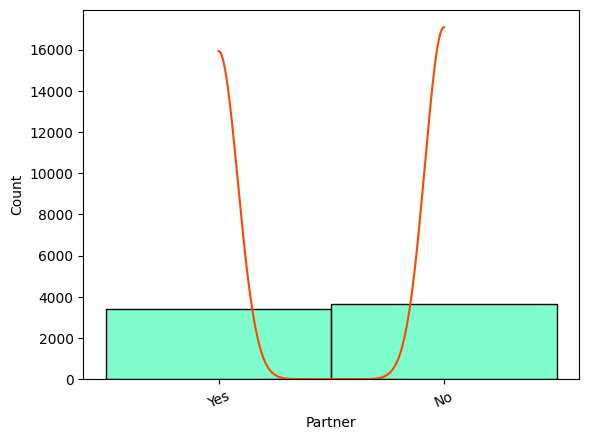

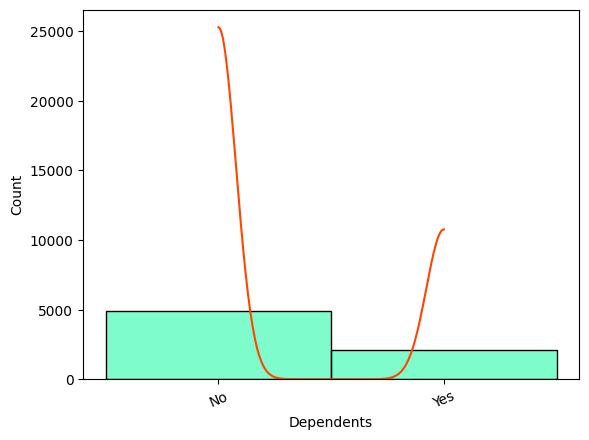

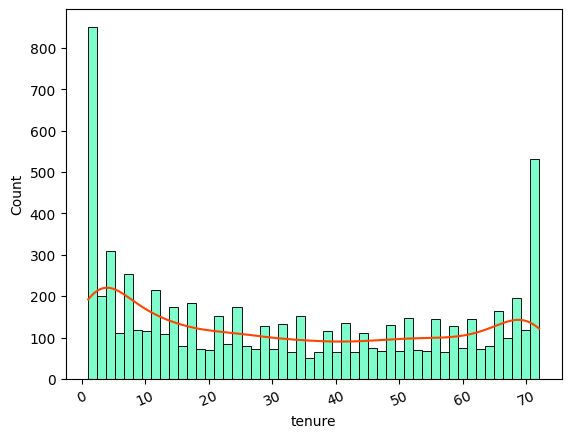

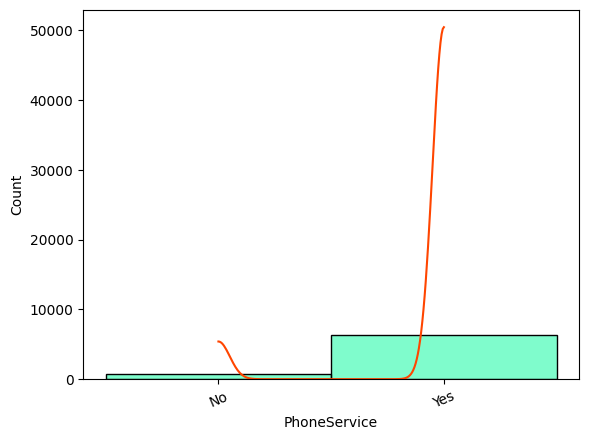

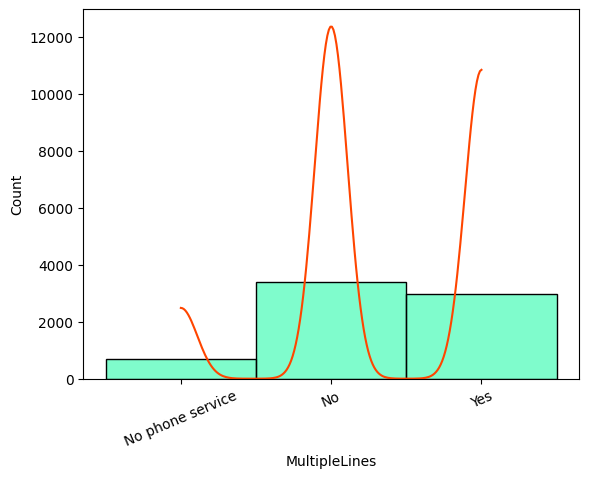

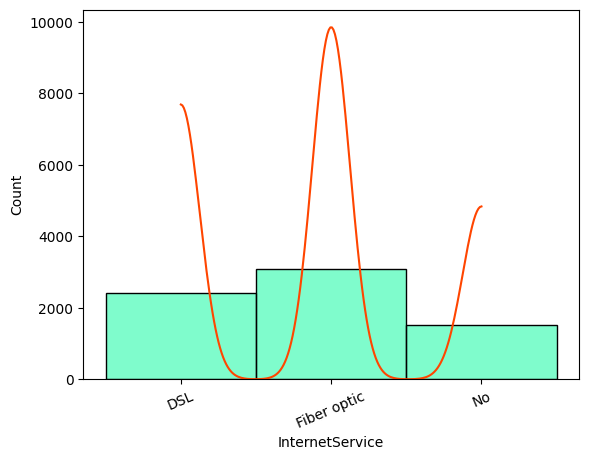

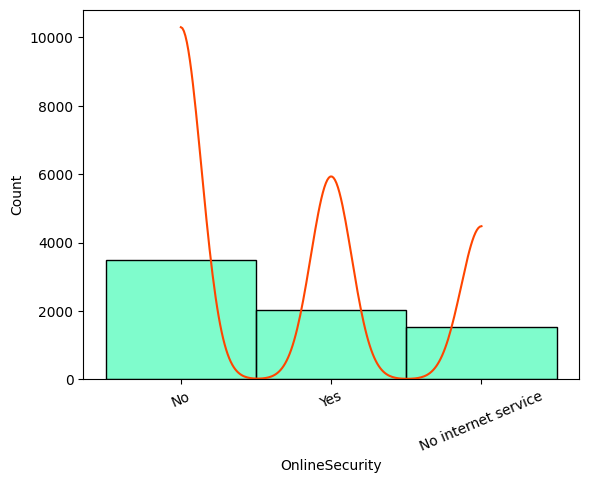

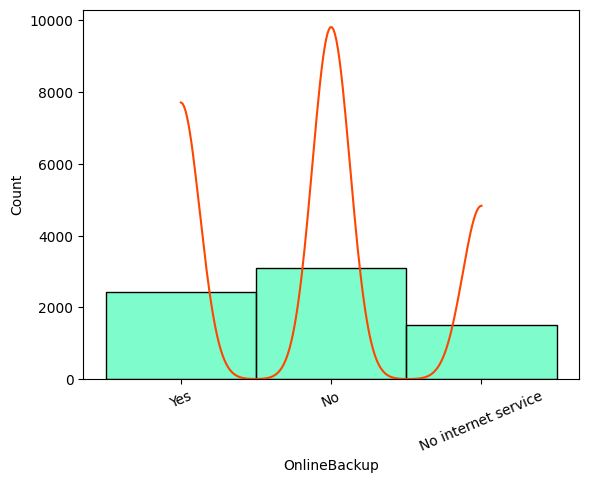

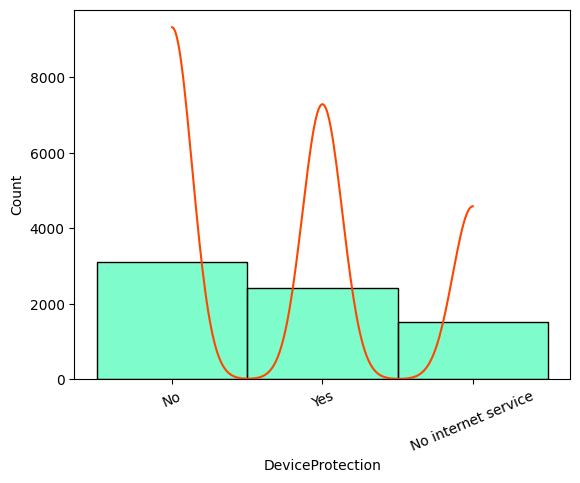

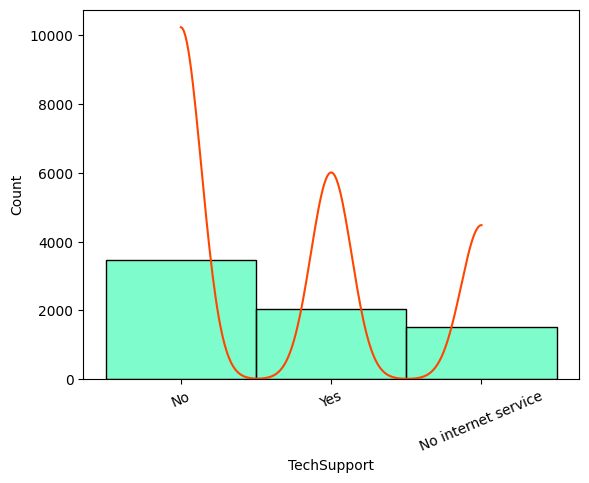

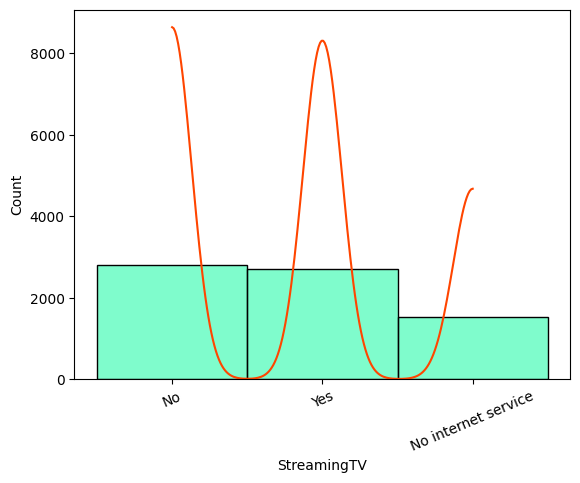

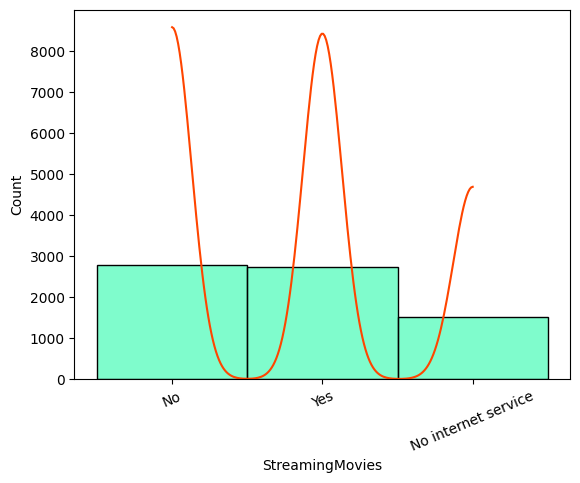

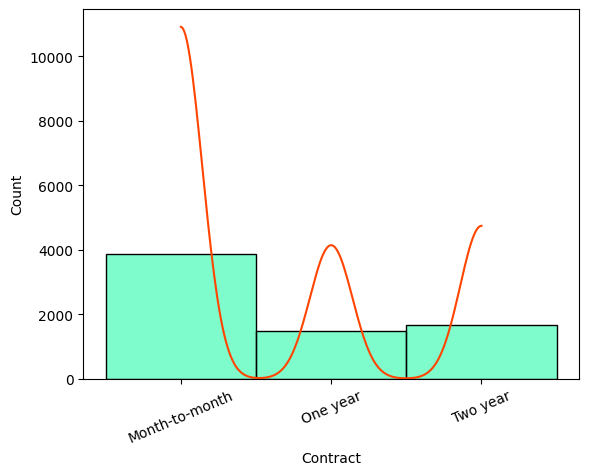

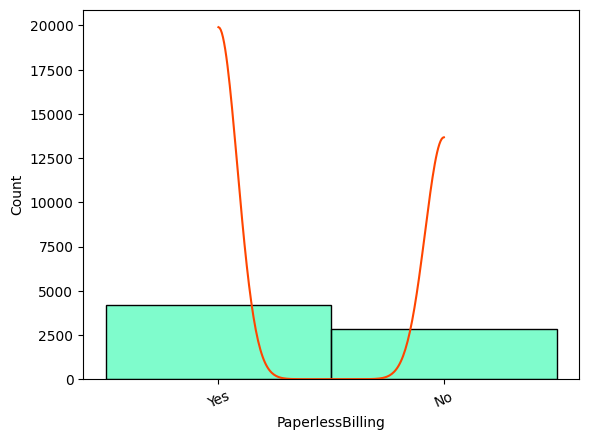

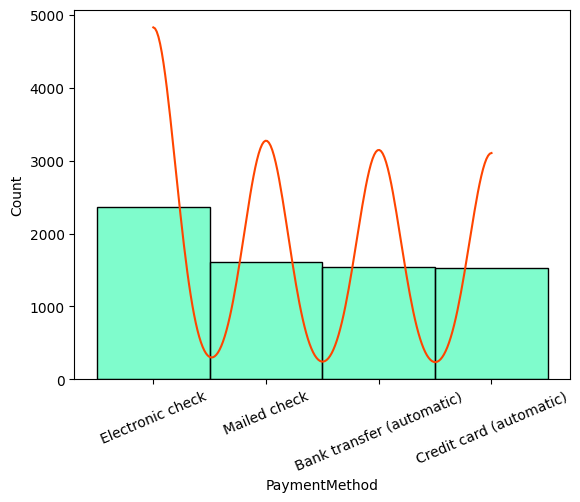

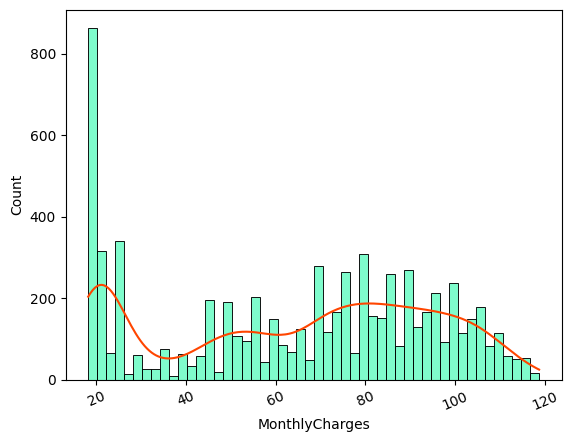

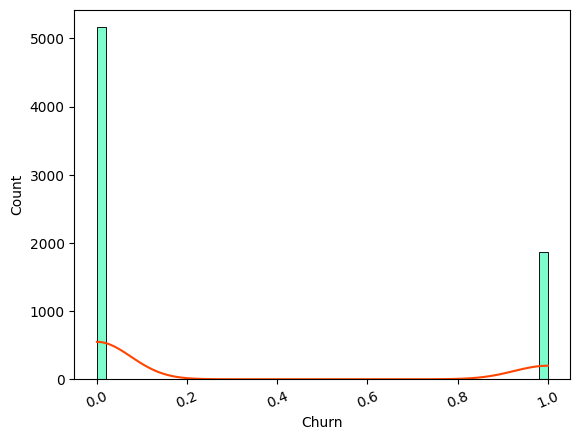

In [18]:
for col in df.columns:
    if col not in ['customerID', 'TotalCharges']:
        ax = sns.histplot(data=df, x=col, kde=True, bins=50, color='mediumspringgreen')
        ax.lines[0].set_color('orangered')
        plt.xticks(rotation=23)
        plt.show()

The histograms above can be classified as:

<ul style="list-style-type:square">
    <li><b>Uniformly Distributed:</b> Gender, Partner</li>
    <li><b>Positively Skewed (Right-skewed):</b> SeniorCitizen, Dependents, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Paperless Billing, Payment Method, Churn</li>
    <li><b>Negatively Skewed (Left-skewed):</b> PhoneService</li>
    <li><b>Randomly Distributed:</b> Tenure, MultipleLines, InternetService, OnlineBackup, Contract, MonthlyCharges</li>
</ul>

Kernel Density Estimation which is a mathematical process of finding an estimate probability density function of a random variable has also been implemented and showcased in the histograms above. The estimation attempts to infer characteristics of a population, based on a finite set of data. The data smoothing problem is a powerful way to estimate probability density. In short, the technique allows one to create a smooth curve against a set of random values

The histograms of Tenure, MultipleLines, InternetService, OnlineBackup, Contract and MonthlyCharges are Randomly Distributed so they need to analysed by considering the various categorical variables available to us so that we can draw proper conclusions from the data

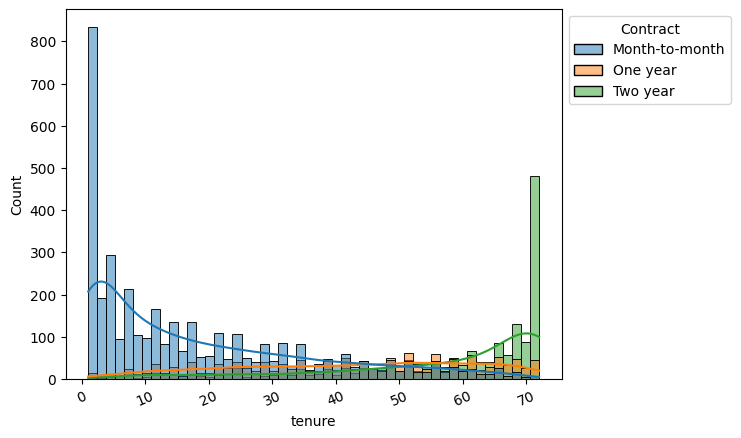

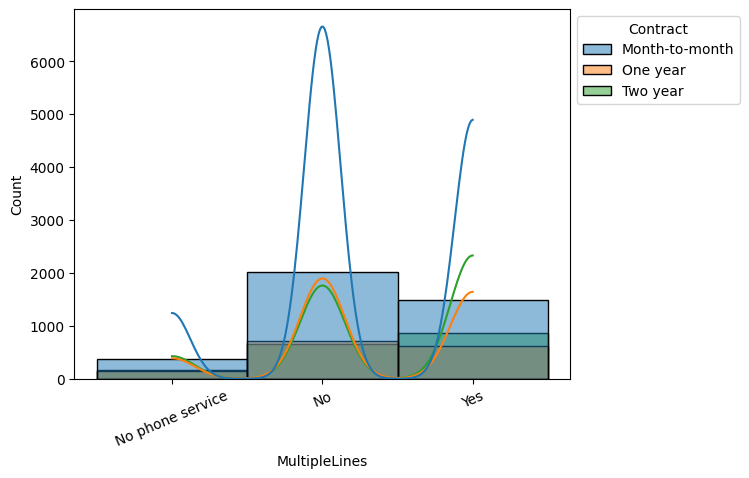

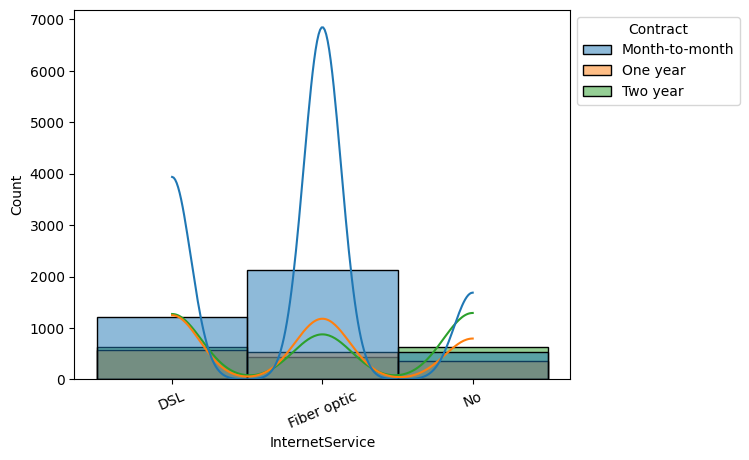

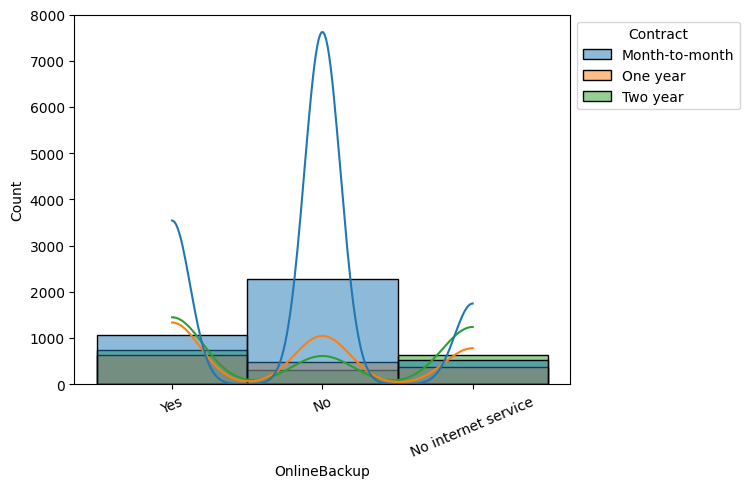

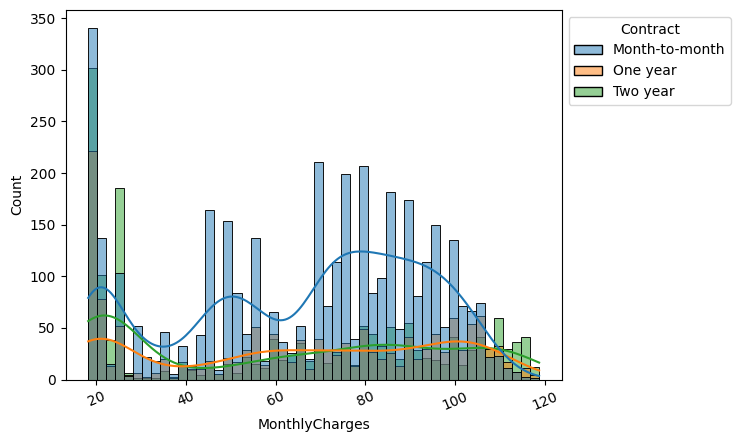

In [19]:
for col in ['tenure', 'MultipleLines', 'InternetService', 'OnlineBackup', 'MonthlyCharges']:
    ax = sns.histplot(data=df, x=col, kde=True, bins=50, hue='Contract')
    sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=23)
    plt.show()

After considering the various categorical variables available to us the best results are obtained by the categorization of NObeyesdad which allows the histograms of Weight and FCVC to be properly classified. The other categorical variables Gender, FAVC, CAEC etc. were unable to provide any fruitful results for the same

The histograms above can thus be classified as:

<ul style="list-style-type:square">
    <li><b>Positively Skewed (Right-skewed):</b> Tenure(Month-to-Month), InternetService(One Year)</li>
    <li><b>Negatively Skewed (Left-skewed):</b> Tenure(Two Year), MultipleLines(Two Year)</li>
    <li><b>Symmetric (Bell-shaped):</b> Tenure(One Year)</li>
    <li><b>Randomly Distributed:</b> MultipleLines(Month-to-Month, One Year), InternetService(Month-to-Month, Two Year), OnlineBackup, MonthlyCharges</li>
</ul>

Sadly the histogram of MultipleLines(Month-to-Month, One Year), InternetService(Month-to-Month, Two Year), OnlineBackup and MonthlyCharges are still classified as Randomly Distributed

Histograms can also be used for comparative analysis so individual plots for all the categorical variables in the dataset will be plotted based on the number of users that have churned or not while also following the classification of that category. This will broaden the horizon and provide results which can be utilized to find the many varying factors which have been leading to churns

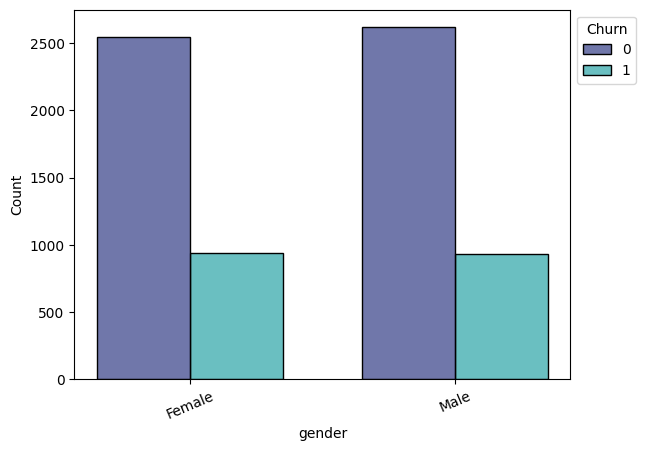

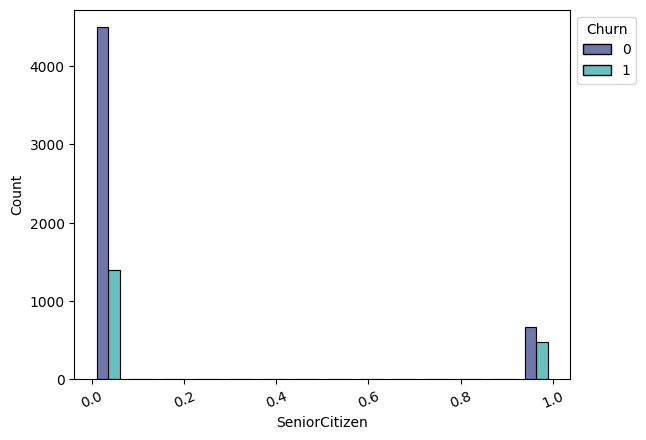

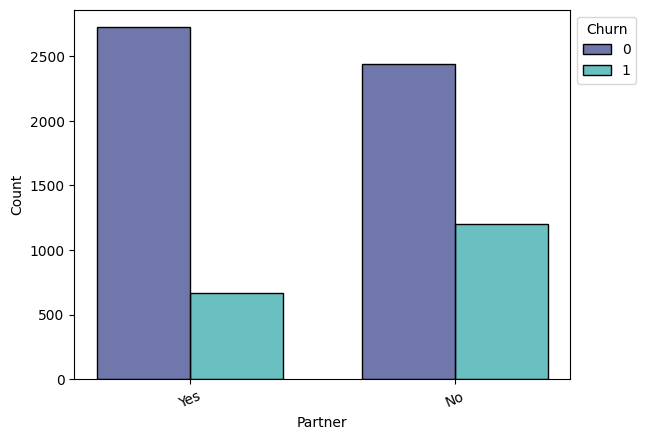

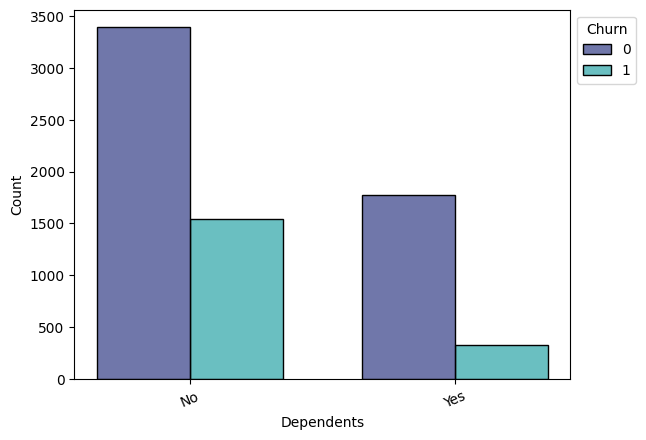

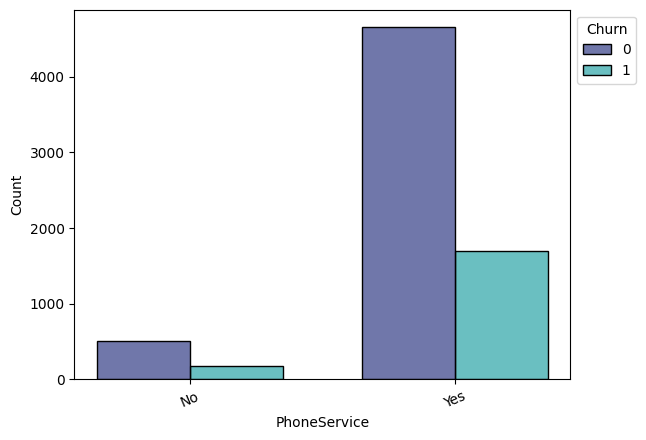

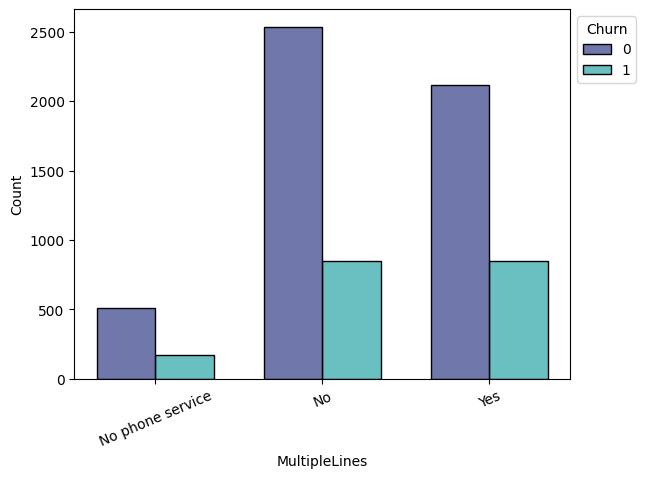

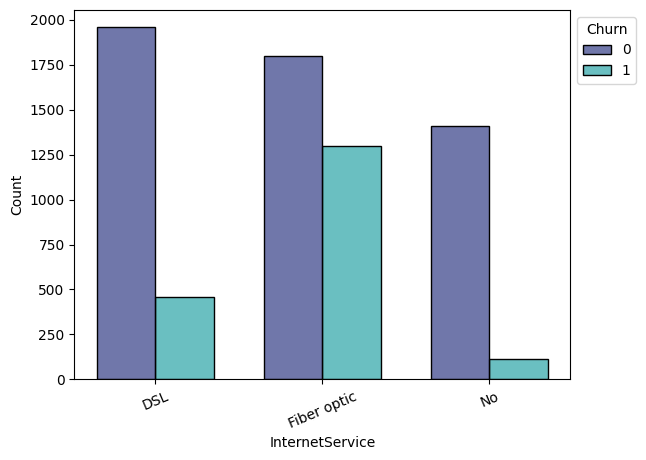

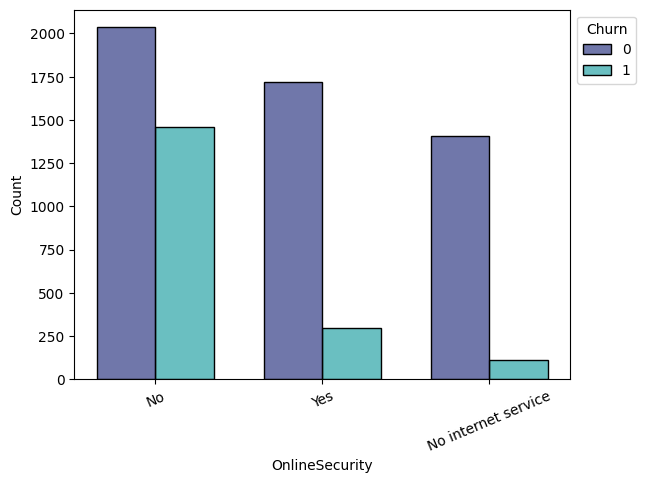

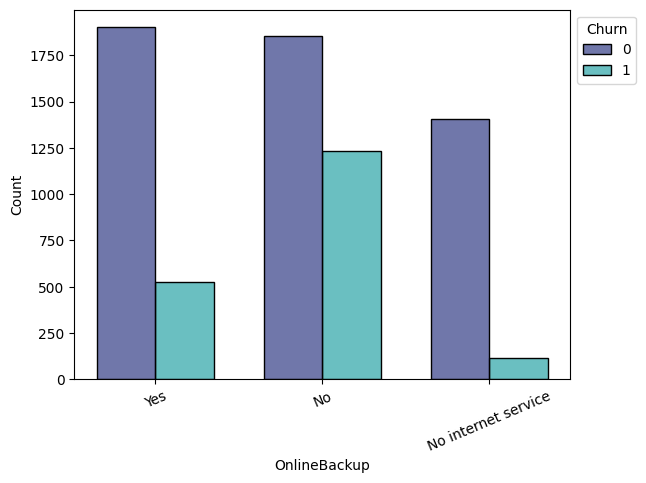

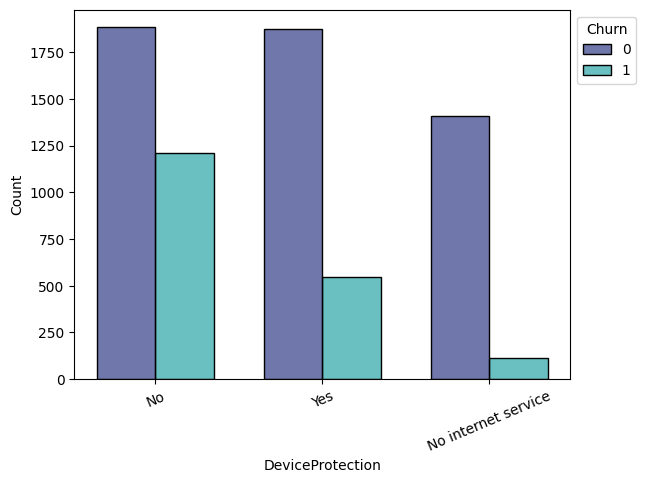

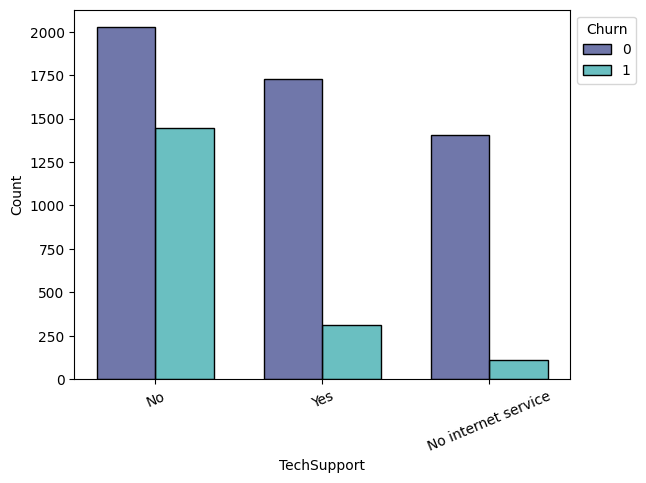

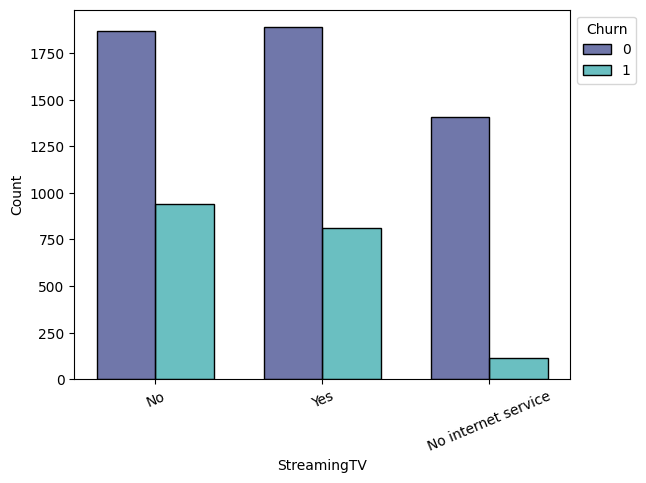

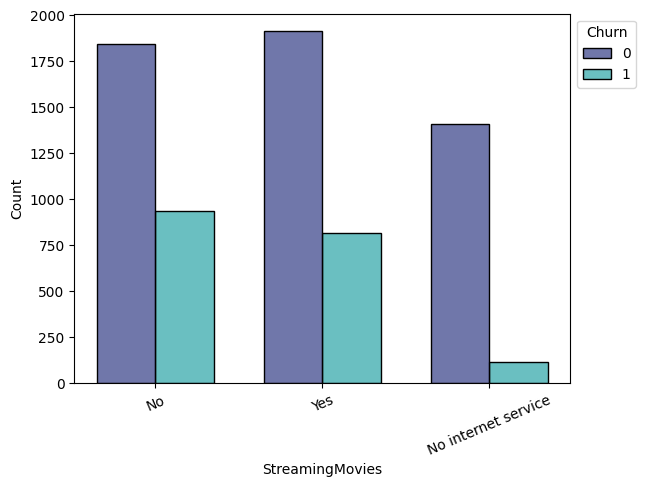

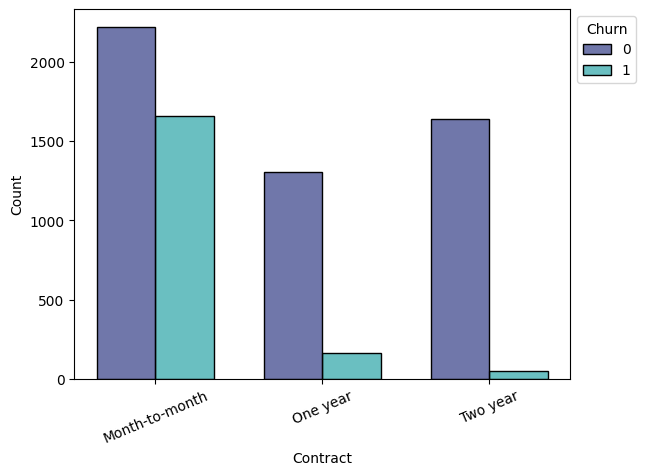

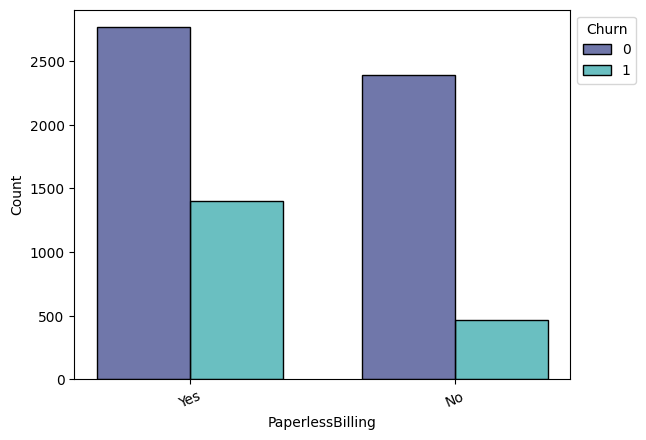

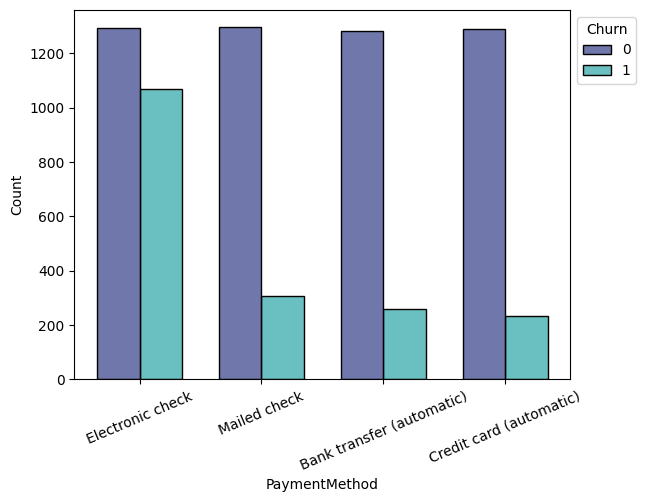

In [20]:
for col in df.columns:
    if col not in ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']:
        ax = sns.histplot(data=df, x=col, hue='Churn', multiple='dodge', shrink=.7, palette='mako')
        sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
        plt.xticks(rotation=23)
        plt.show()

From the histograms above we can conclude that:

<ul style="list-style-type:square">
    <li>The number of male and female users that have churned is almost the same</li>
    <li>The younger generation has almost double the churn rate as compared to their elder counterparts</li>
    <li>Customers that do not have a partner are more prone to churn</li>
    <li>Customers that do not have dependents are more inclined to churn</li>
    <li>Customers that opted for PhoneService are churning more and whether they have MultipleLines or not the churn rate seems to be almost the same</li>
    <li>Customers that opted for Fiber optic InternetService are more liable to churn</li>
    <li>Customers that do not have OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport partner are more susceptible to churn</li>
    <li>Customers that do or do not utilize StreamingTV and StreamingMovies are almost equally likely to churn</li>
    <li>Customers that have a Month-to-Month Contract are more willing to churn</li>
    <li>Customers that utilize PaperlessBilling and Electronic checks as their PaymentMethod are churning more</li>
</ul>

#### Box Plot Analysis

Box plots visualize the data in a standardized way using 5 summaries – Minimum, First Quartile (Q1), Median, Third Quartile (Q3) and Maximum. Box plot is also termed as box and whisker plot

<ul style="list-style-type:square">
    <li><b>Minimum:</b> The minimum value from the data</li>
    <li><b>First Quartile (Q1):</b> The first quartile is the median of the lower half of the data. Also known as lower quartile</li>
    <li><b>Median:</b> The median is the middle value of the data, which divides the data into two equal parts. The median is considered as the second quartile</li>
    <li><b>Third Quartile (Q3):</b> The third quartile is the median of the upper half of the data. Also known as upper quartile</li>
    <li><b>Maximum:</b> The maximum value from the data</li>
</ul>

Box Plots can be classified as:

<ul style="list-style-type:square">
    <li><b>Positively Skewed:</b> If the distance from the median to the maximum is greater than the distance from the median to the minimum, then the box plot is positively skewed</li>
    <li><b>Negatively Skewed:</b> If the distance from the median to minimum is greater than the distance from the median to the maximum, then the box plot is negatively skewed</li>
    <li><b>Symmetric:</b> The box plot is said to be symmetric if the median is equidistant from the maximum and minimum values</li>
</ul>

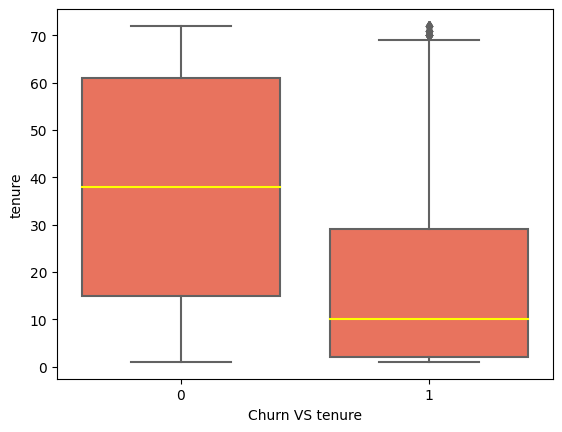

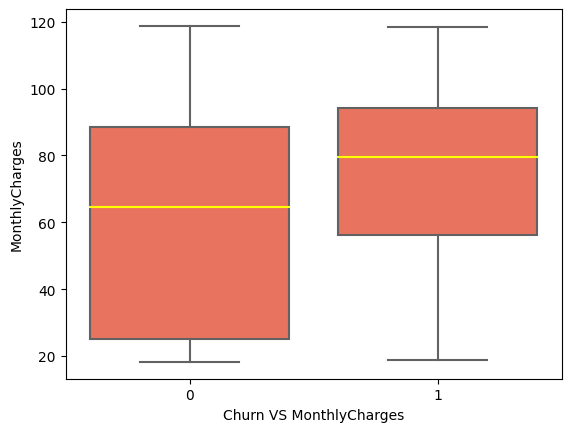

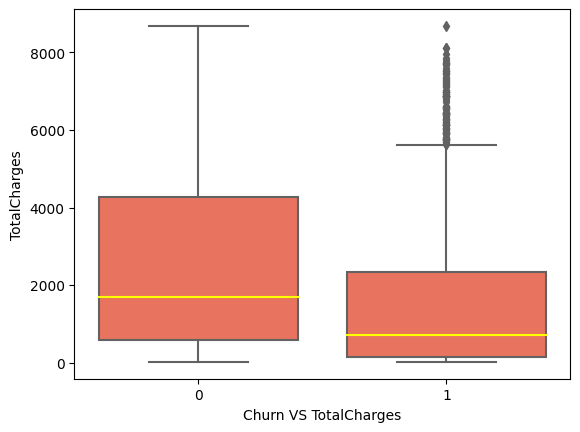

In [21]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    sns.boxplot(x=df['Churn'], y=df[col], color='tomato', medianprops={'color': 'yellow'})
    plt.xlabel(f'Churn VS {col}')
    plt.show()

From the box plots above we can conclude that:

<ul style="list-style-type:square">
    <li>Customers that tend to churn tend to stay for shorter tenures with the company as seen in the Churn VS tenure plot</li>
    <li>The lower the MonthlyCharges the lesser is the chance that the customer may churn based on the Churn VS MonthlyCharges plot</li>
    <li>Churn seems to be higher when the TotalCharges are lower however there are many outliers which also indicates that churn is higher if the TotalCharges become exorbitant thus finding the right balance can prove to be crucial in determining whether a customer will churn or not</li>
</ul>

The box plots above can be classified as:

<ul style="list-style-type:square">
    <li><b>Positively Skewed:</b> Tenure(Churn), MonthlyCharges(No Churn), TotalCharges(Churn and No Churn)</li>
    <li><b>Negatively Skewed:</b> MonthlyCharges(Churn)</li>
    <li><b>Symmetric:</b> Tenure(No Churn)</li>
</ul>

### Predictive Analytics

Predictive analytics is a branch of advanced analytics that makes predictions about future outcomes using historical data combined with statistical modeling, data mining techniques and machine learning. Predictive analytics is used to find patterns in data to identify risks and opportunities

#### Logistic Regression

Logistic Regression is used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on the attributes of the dataset. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds which means that the probability of success divided by the probability of failure

Logistic Regression can be classified as:

<ul style="list-style-type:square">
    <li><b>Binomial:</b> Logistic Regression can be classified as Binomial when the dependent variable has only two possible outcomes such as 0 or 1, True or False, etc.</li>
    <li><b>Multinomial:</b> In this type of logistic regression, the dependent variable has three or more possible outcomes however, these values have no specified order</li>
    <li><b>Ordinal:</b> Ordinal logistic regression is leveraged when the response variable has three or more possible outcomes but in this case, these values do have a defined order. For example grading scales from A to F or rating scales from 1 to 5</li>
</ul>

In [22]:
y = df2['Churn'].values
x = df2.drop('Churn', axis=1)

# Bounding all the variables between 0 and 1
scaler = preprocessing.MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the Logistic Regression model
lr = LogisticRegression(max_iter=200)  
lr.fit(x_train, y_train)

# Making predictions on test set
y_pred = lr.predict(x_test)

# Actual value VS Predicted value
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
lr_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0


In [24]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8


<AxesSubplot: >

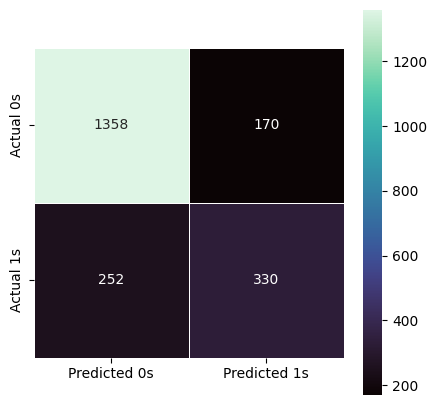

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='mako')

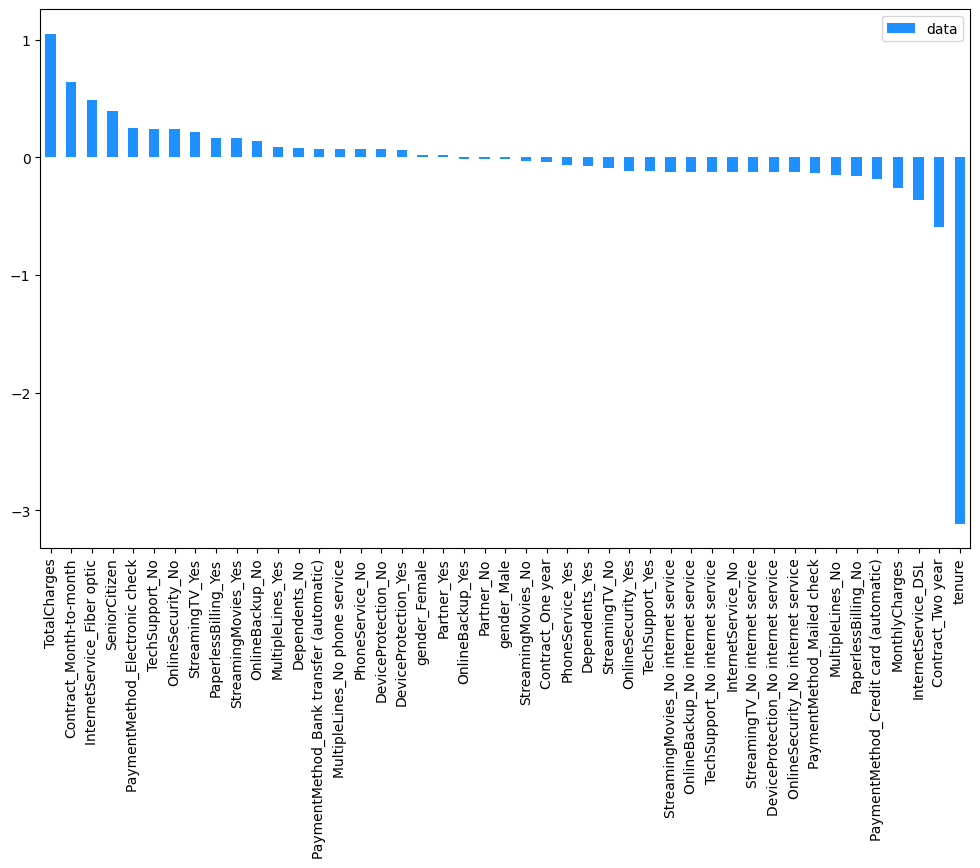

In [26]:
data = pd.DataFrame(lr.coef_[0], index=x.columns, columns=['data']).sort_values('data', ascending=False)

fig, ax = plt.subplots(figsize=(12, 7))
data.plot(kind='bar', color='dodgerblue', ax=ax)
plt.show()

Some conclusions that can be drawn are:

<ul style="list-style-type:square">
    <li>TotalCharges, Contract(Month-to-Month) and InternetService(Fiber optic) have the most adverse effect on the churn rate</li>
    <li>Contract(Two year), InternetService(DSL) and tenure reduce the chance of churn</li>
</ul>

The Logistic Regression model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.8</li>
    <li><b>Correct Predictions:</b> 1688</li>
    <li><b>Incorrect Predictions:</b> 422</li>
    <li><b>Type:</b> Binomial</li>
</ul>

#### Support Vector Machine

Support Vector Machine or SVM is used for Classification as well as Regression problems. Primarily it is used for Classification problems in Machine Learning. The goal in SVM is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily categorize new data points. This best decision boundary is called a hyperplane. SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence the algorithm is termed as Support Vector Machine

SVM is of two types:

<ul style="list-style-type:square">
    <li><b>Linear:</b> Linear SVM is used for linearly separable data, which means that the dataset can be classified into two classes by using a straight line, then such data is linearly separable thus the classifier used is known as Linear SVM</li>
    <li><b>Non-Linear:</b> Non-Linear SVM is used for non-linear data, which means that the dataset cannot be classified by using a straight line because there are more than two classes, then such data is non-linear and the classifier used is known as Non-linear SVM</li>
</ul>

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the SVM model
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

# Making predictions on test set
y_pred = svm.predict(x_test)

# Actual value VS Predicted value
svm_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
svm_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0


In [28]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7895734597156399


<AxesSubplot: >

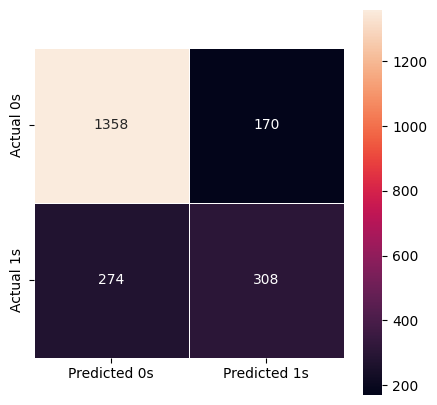

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='rocket')

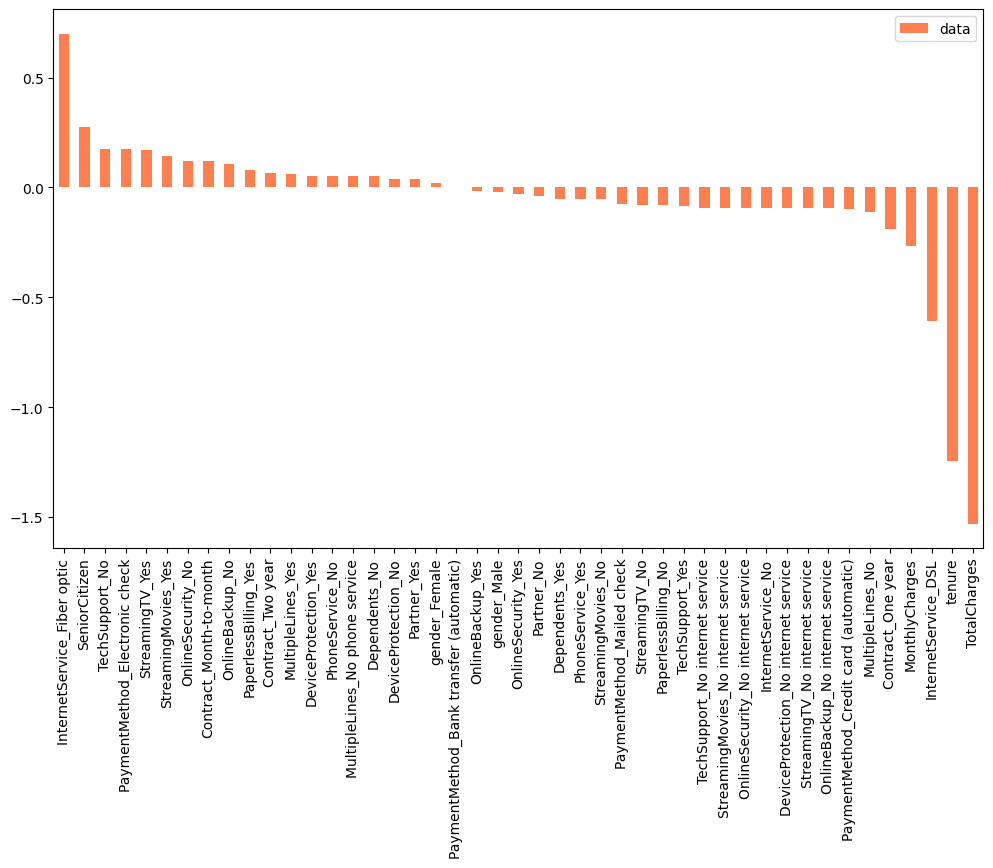

In [30]:
data = pd.DataFrame(svm.coef_[0], index=x.columns, columns=['data']).sort_values('data', ascending=False)

fig, ax = plt.subplots(figsize=(12, 7))
data.plot(kind='bar', color='coral', ax=ax)
plt.show()

Some conclusions that can be drawn are:

<ul style="list-style-type:square">
    <li>InternetService(Fiber optic), Seniority and TechSupport(No) have the most adverse effect on the churn rate</li>
    <li>TotalCharges, tenure and InternetService(DSL) reduce the chance of churn</li>
</ul>

The SVM model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.7895734597156399</li>
    <li><b>Correct Predictions:</b> 1666</li>
    <li><b>Incorrect Predictions:</b> 444</li>
    <li><b>Type:</b> Linear</li>
</ul>

#### kNN

The k-nearest neighbors algorithm, also known as kNN is a non-parametric, supervised learning algorithm which uses proximity to make classifications or predictions about the grouping of individual data points. It can be used for both regression and classification problems but is typically used as a classification algorithm, working off the assumption that similar points can be found near one another

The kNN algorithm thus can be considered as a voting system, where the majority class label determines the class label of a new data point among its nearest ‘k’ neighbors in the feature space. Imagine a small village with a few hundred residents, and you must decide which political party you should vote for. To do this, you might go to your nearest neighbors and ask which political party they support. If the majority of your 'k' nearest neighbors support party A, then you would most likely also vote for party A. This is similar to how the KNN algorithm works where the majority class label determines the class label of a new data point among its k nearest neighbors

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the KNN model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Making predictions on test set
y_pred = knn.predict(x_test)

# Actual value VS Predicted value
knn_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
knn_diff.head()

,Actual value,Predicted value
0,0,1
1,1,0
2,0,0
3,1,0
4,0,0


In [32]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7530805687203791


In kNN the model's performance is dependent on way the data is split which means that we may be able to improve the model's performance by  optimizing the value of 'k' (the number of neighbors). A solution for this is cross-validation

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples which represents the number of folds. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged or combined to produce a single estimation. The advantage of this is that all observations are used for both training and testing and that each observation is used for testing exactly once

In [33]:
param_grid = {'n_neighbors': [i for i in range(2, 51)]}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn, param_grid, n_jobs=-1)
knn_cv.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]})

In [34]:
knn_cv.best_params_

{'n_neighbors': 48}

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the kNN model
knn = KNeighborsClassifier(n_neighbors=48)
knn.fit(x_train, y_train)

# Making predictions on test set
y_pred = knn.predict(x_test)

# Actual value VS Predicted value
knn_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
knn_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [36]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7796208530805687


<AxesSubplot: >

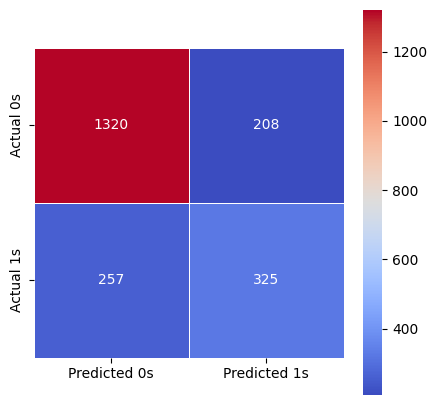

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='coolwarm')

The model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.7796208530805687</li>
    <li><b>Correct Predictions:</b> 1686</li>
    <li><b>Incorrect Predictions:</b> 424</li>
</ul>

#### Naïve Bayes

The Naïve Bayes classifier is a supervised machine learning algorithm which is used for classification. It is also part of the family of generative learning algorithms which means that it seeks to model the distribution of inputs of a given class or category. Unlike discriminative classifiers, like logistic regression, it does not learn which features are most important to differentiate between classes.

Naïve Bayes is also known as a probabilistic classifier since it is based on Bayes’ Theorem. Bayes’ Theorem is distinguished by its use of sequential events where information acquired later impacts the initial probability. These probabilities are denoted as the prior probability and the posterior probability. The prior probability is the probability of the occurance of an event before it has been contextualized under a certain condition whereas the posterior probability is the probability of the occurance of an event after it has been contextualized under a certain condition

Naïve Bayes is of three types:

<ul style="list-style-type:square">
    <li><b>Gaussian:</b> The Gaussian model assumes that features follow a normal distribution. This means that the predictor takes continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution</li>
    <li><b>Multinomial:</b> The Multinomial Naïve Bayes classifier is used when the data is multinomial in nature. It is primarily used for document classification problems which means a particular document belongs to a category such as Sports, Politics, Education, etc. The classifier uses the frequency of words as the predictors</li>
    <li><b>Bernoulli:</b> The Bernoulli classifier works similar to the Multinomial classifier but the predictor variables are independent Booleans variables. Such as if a particular word is present or not in a document. This model is used in binary classification problems</li>
</ul>

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the Bernoulli Naïve Bayes model
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

# Making predictions on test set
y_pred = bnb.predict(x_test)

# Actual value VS Predicted value
bnb_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
bnb_diff.head()

,Actual value,Predicted value
0,0,1
1,1,1
2,0,0
3,1,1
4,0,0


In [39]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7080568720379147


<AxesSubplot: >

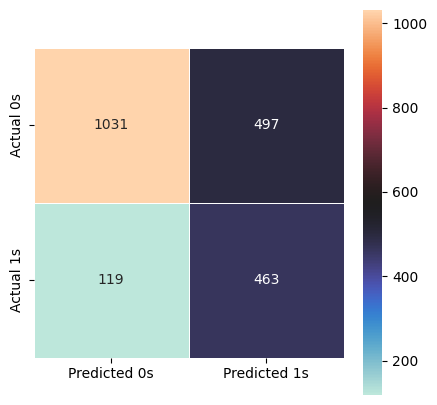

In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='icefire')

The model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.7080568720379147</li>
    <li><b>Correct Predictions:</b> 1494</li>
    <li><b>Incorrect Predictions:</b> 616</li>
    <li><b>Type:</b> Bernoulli</li>
</ul>

#### Random Forest

Random forest is a machine learning algorithm which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it is capable of handling both classification and regression problems

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical tree like structure which consists of a root node, branches, internal nodes and leaf nodes. A decision tree starts with a root node, which does not have any incoming branches. The outgoing branches from the root node then feed into the internal nodes which are also known as decision nodes. Based on the available features, both node types conduct evaluations to form homogenous subsets, which are denoted by leaf nodes and represent all the possible outcomes within the dataset. Decision trees thus classify data by sorting it down the tree from the root to a leaf node based on the attributes specified by the nodes in the tree

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the Random Forest model
rfc = RandomForestClassifier(n_estimators=750 , max_leaf_nodes=20, n_jobs=-1, random_state=25)
rfc.fit(x_train, y_train)

# Making predictions on test set
y_pred = rfc.predict(x_test)

# Actual value VS Predicted value
svm_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
svm_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0


In [42]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7990521327014218


<AxesSubplot: >

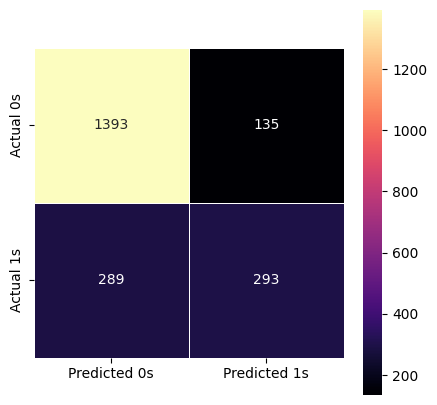

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='magma')

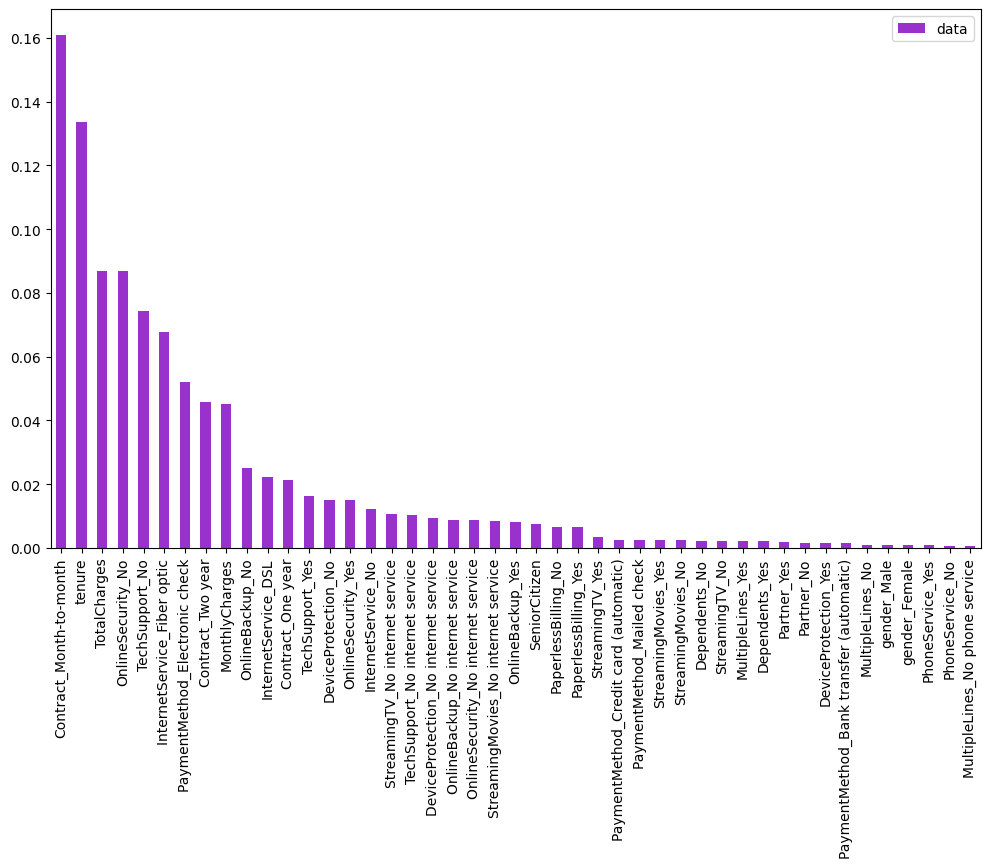

In [44]:
data = pd.DataFrame(rfc.feature_importances_, index=x.columns, columns=['data']).sort_values('data', ascending=False)

fig, ax = plt.subplots(figsize=(12, 7))
data.plot(kind='bar', color='darkorchid', ax=ax)
plt.show()

Some conclusions that can be drawn are:

<ul style="list-style-type:square">
    <li>Contract(Month-to-Month), tenure and TotalCharges impact churn rate the most which is similar to what we saw from the results of SVM and Logistic Regression</li>
    <li>Unlike previous models seniority ranks quite low when talking about whether it is an important predictor or not</li>
</ul>

The model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.7990521327014218</li>
    <li><b>Correct Predictions:</b> 1686</li>
    <li><b>Incorrect Predictions:</b> 424</li>
</ul>

### Predictive Analytics using Boosting Algorithms

The principle behind boosting algorithms is that we first build a model on the training dataset and then build a second model to rectify the errors present in the first model. This procedure is continued until and unless the errors are minimized and the correct predictions are made. Due to this behavior, boosting has become a prevalent technique for tackling binary classification problems. Boosting algorithms thus improve prediction power by converting a number of weak learners into strong learners

#### AdaBoost

The AdaBoost algorithm short for Adaptive Boosting is a boosting algorithm used in Machine Learning

Adaboost starts by making predictions on the original dataset by assigning equal weightage to each observation. If the prediction made using the first learner is incorrect, it allocates higher weight to that incorrectly predicted point. Now all the points with higher weights are given more importance in the next model. It then goes on to add new learners and train models until and unless a lower error is received or the model training limit is reached

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Fitting the AdaBoost model
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

# Making predictions on test set
y_pred = ada.predict(x_test)

# Actual value VS Predicted value
ada_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
ada_diff.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0


In [46]:
# Model Accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7924170616113744


<AxesSubplot: >

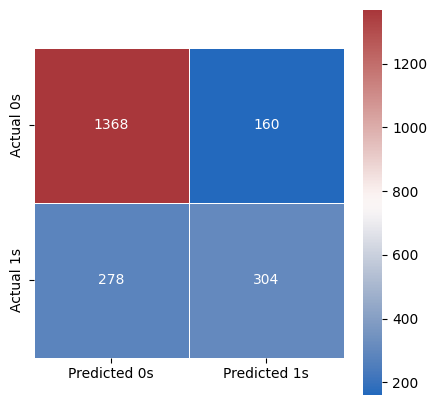

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
x_labels, y_labels = ['Predicted 0s', 'Predicted 1s'], ['Actual 0s', 'Actual 1s']
sns.heatmap(cm, annot=True, fmt='g', square=True, linewidth=0.5, xticklabels=x_labels, yticklabels=y_labels, ax=ax, cmap='vlag')

The model has been evaluated on the following metrics:

<ul style="list-style-type:square">
    <li><b>Accuracy:</b> 0.7924170616113744</li>
    <li><b>Correct Predictions:</b> 1672</li>
    <li><b>Incorrect Predictions:</b> 438</li>
</ul>